# NHS Leavers Time Series 

## Import Packages

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.style as style 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

## Load Dataset

In [ ]:
file_path = r'S:\WP Personnel\A - Workforce\Data science student\Desys Corner\NHS_Leavers_Detail_New.csv'
leavers = pd.read_csv(file_path, parse_dates=['Termination Date'], dayfirst=True)

## Create Monthly Time Series 

### Raw Monthly Time Series 

In [6]:
leavers['Month'] = leavers['Termination Date'].dt.to_period('M').dt.to_timestamp()
monthly_leavers = leavers.groupby('Month').size().to_frame(name = 'leavers')
monthly_leavers.index.freq = 'MS' #Monthly start frequency 

### Raw Monthly Time Series 

Text(0, 0.5, 'Number of Leavers')

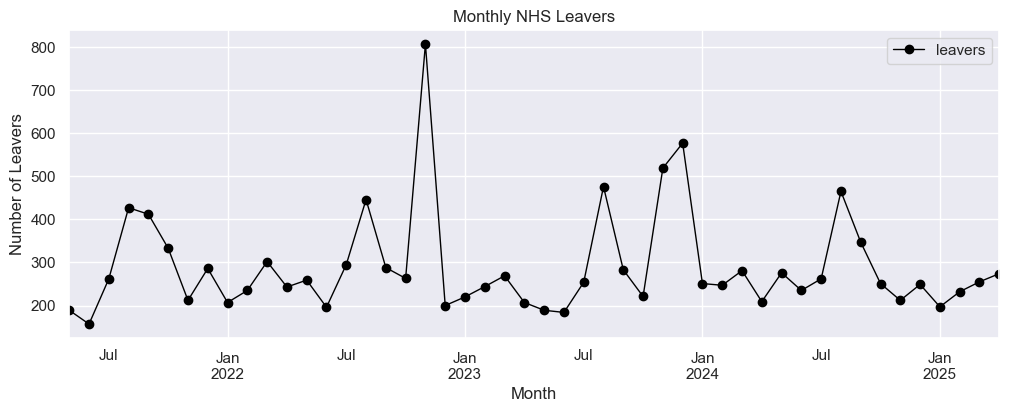

In [7]:
_ = monthly_leavers.plot(figsize=(12, 4), color='black', linestyle='-', marker='o', linewidth=1)
plt.title('Monthly NHS Leavers')
plt.ylabel('Number of Leavers')

### Interpretation 
Early months (2021-2022) - Leavers ranged from ~ 150 - 430 per month
Recent months (2024-2025) - Continue at high levels, peaking at 465 in August 2024

Suggestion: Data shows strong mid year peaks - suggesting that this is likely due to contract/academic cycles.

### Adjust For Days In Month 

In [10]:
days_in_month = monthly_leavers.index.days_in_month
leavers_per_day = monthly_leavers['leavers']/ days_in_month

### Adjusted time series 

Text(0, 0.5, 'Leavers per day')

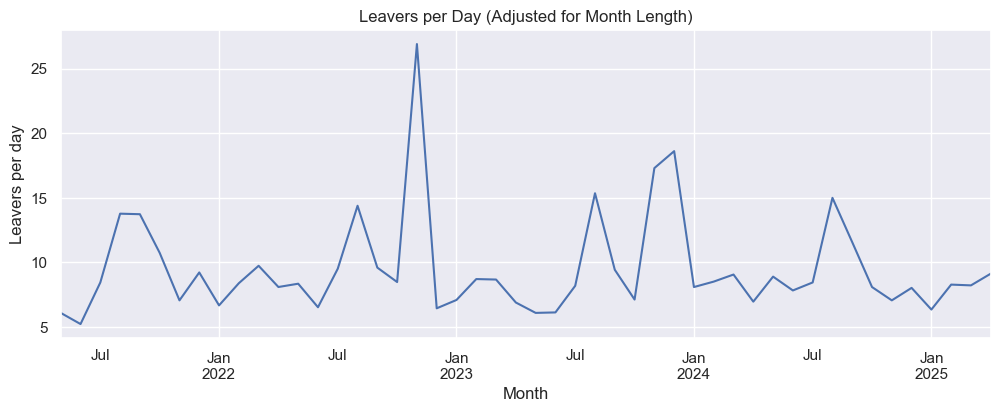

In [11]:
# Plot adjusted time series 
_ = leavers_per_day.plot(figsize=(12, 4), title='Leavers per Day (Adjusted for Month Length)')
plt.ylabel('Leavers per day')

### Interpretation 
- Adjusting for month length reveals clear seasonal peaks - August is consistently high
- Months such as may (~6.1/day) are well below average !

### 12 month moving average

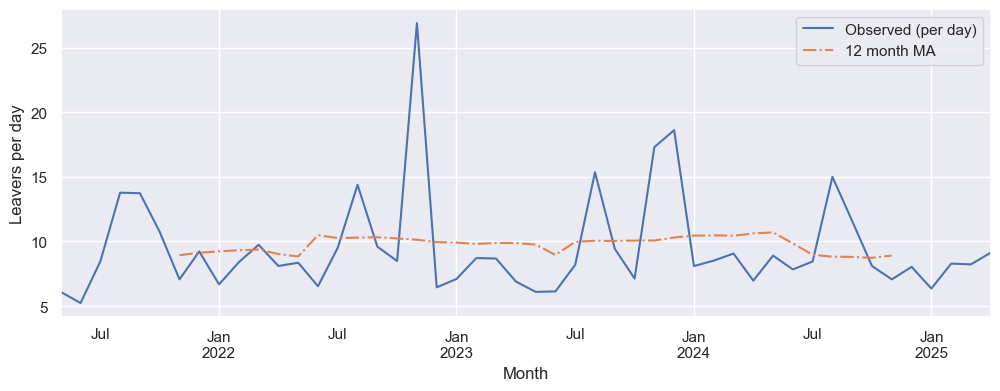

In [17]:
ma12 = leavers_per_day.rolling(window=12, center=True).mean()

ax = leavers_per_day.plot(figsize=(12, 4), label='Observed (per day)')
_ = ma12.plot(ax=ax, linestyle='-.', label='12 month MA')
_ = ax.legend()
_ = ax.set_ylabel('Leavers per day')

### Interpretation 
Peak: Around 10.7 leavers per day (May 2024)
Decline: Begins from June 2024 - dropping to 8.9 by November 2024

Suggetions:
- Had an upward trend through 2023 and early 2024
- Mild decline afterwards, possibly showing improved retention or lower overall workforce?

### Seasonal Decomposition 

Description of Each Component 
- Observed: The original time series (leavers per day)
- Trend: The long term direction or movement in the data
- Seasonal: The repeating monthly variation (such as more leavers in certain months)
- Residual: Irregularity or noise after removing trend and seasonality (whats left)

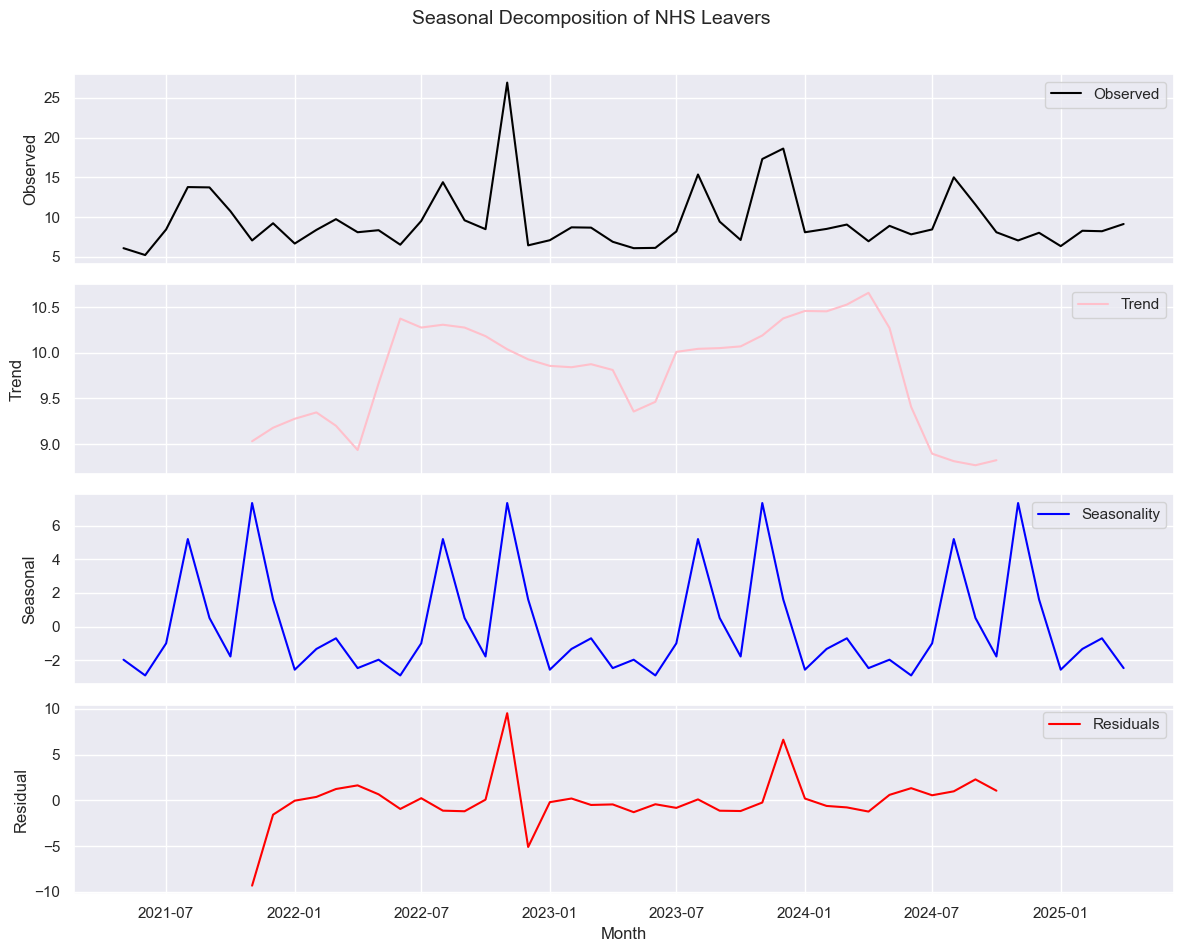

In [16]:
 decomp = seasonal_decompose(leavers_per_day, model='additive')

trend = decomp.trend 
seasonal = decomp.seasonal
residual = decomp.resid
observed = decomp.observed 

fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axes[0].plot(observed, label='Observed', color='black')
axes[0].set_ylabel('Observed')
axes[0].legend()

axes[1].plot(trend, label='Trend', color='pink')
axes[1].set_ylabel('Trend')
axes[1].legend()

axes[2].plot(seasonal, label='Seasonality', color='blue')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

axes[3].plot(residual, label='Residuals', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()

plt.suptitle('Seasonal Decomposition of NHS Leavers', fontsize=14)
plt.xlabel('Month')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### Interpretation
#### Seasonal Pattern
Seasonality: 
- Highs (+ve seasonality):
- August (~+5.2)
- November + May (~+7.3)

- Lows (-ve seasonality):
- January (~-2.6)
- June (~-2.9)
- April (~-2.5)

Trend 
- Peaks around late 2023 - mid 2024 (~10.6 per day)
- Downward drift starting late 2024

Residuals 
- Large spikes (+6.6 in Dec 2023) suggesting outliers or special occasions
- Mostly minimal residuals therefore suggesting model fits well !
